# Module

In [ ]:
# 과학계산
import pandas as pd
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)
import numpy as np

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score, log_loss

# 기타
import datetime
import warnings
warnings.filterwarnings('ignore')

# Rectified Dataset split

In [ ]:
train = pd.read_csv('../dataset_processed/train_538132.csv')
val = pd.read_csv('../dataset_processed/validation_179377.csv')
test = pd.read_csv('../dataset_processed/test_179378.csv')

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(538132, 86)
(538132,)
(179377, 86)
(179377,)
(179378, 86)
(179378,)


# Training

## DecisionTree
(K-fold cross validation -> K=cv)

### pipeline object



In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('clf', DecisionTreeClassifier())
])

### param_grid (hyperparameter input)

In [ ]:
# pipeline object에 대해 지정해줄 수 있는 hyperparameter를 얻을 수 있음
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'clf', 'clf__ccp_alpha', 'clf__class_weight', 'clf__criterion', 'clf__max_depth', 'clf__max_features', 'clf__max_leaf_nodes', 'clf__min_impurity_decrease', 'clf__min_samples_leaf', 'clf__min_samples_split', 'clf__min_weight_fraction_leaf', 'clf__random_state', 'clf__splitter'])

In [ ]:
# define the hyperparameters you want to search over
param_grid = {
    'clf__max_depth':[1,5,10,50,100],
    #'clf__min_samples_leaf':[4,6],
    'clf__min_samples_split':[20,30,40]
}

### Scoring Function

In [ ]:
# Define the scorer to use in the grid search
# greater_is_better=False -> since we want the negative value of log loss
scoring = {'neg_log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
#            'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score),
#            'recall': make_scorer(recall_score),
#            'f1': make_scorer(f1_score)
          }

### Grid Search

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='neg_log_loss')
# scoring=scoring

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf', DecisionTreeClassifier())]),
             param_grid={'clf__max_depth': [1, 5, 10, 50, 100],
                         'clf__min_samples_split': [20, 30, 40]},
             refit='neg_log_loss',
             scoring={'neg_log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)})

### Hyperparameter에 따른 Estimator 비교

In [ ]:
# 저장된된 파일들의 모델 이름 정해주기
model_name = 'DecisionTree_original'

In [ ]:
# grid search 결과 df로 저장
df_result_ = pd.DataFrame(grid_search.cv_results_)

df_result_.to_csv('%s_estimator_%s.csv'%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), index=True, float_format='%.6f') # 이름 설정해줘야함

df_result_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_depth,param_clf__min_samples_split,params,split0_test_neg_log_loss,split1_test_neg_log_loss,split2_test_neg_log_loss,split3_test_neg_log_loss,split4_test_neg_log_loss,mean_test_neg_log_loss,std_test_neg_log_loss,rank_test_neg_log_loss
0,0.843632,0.032019,0.061105,0.012270,1,20,"{'clf__max_depth': 1, 'clf__min_samples_split': 20}",-0.438589,-0.438334,-0.438376,-0.438635,-0.438447,-0.438476,0.000118,4
1,1.520955,0.847998,0.123032,0.075030,1,30,"{'clf__max_depth': 1, 'clf__min_samples_split': 30}",-0.438589,-0.438334,-0.438376,-0.438635,-0.438447,-0.438476,0.000118,4
2,1.843435,0.644767,0.115739,0.042633,1,40,"{'clf__max_depth': 1, 'clf__min_samples_split': 40}",-0.438589,-0.438334,-0.438376,-0.438635,-0.438447,-0.438476,0.000118,4
3,7.073084,1.984380,0.104209,0.042871,5,20,"{'clf__max_depth': 5, 'clf__min_samples_split': 20}",-0.431733,-0.431462,-0.431321,-0.431466,-0.431757,-0.431548,0.000169,1
4,3.478073,0.420110,0.064872,0.007854,5,30,"{'clf__max_depth': 5, 'clf__min_samples_split': 30}",-0.431733,-0.431462,-0.431321,-0.431466,-0.431757,-0.431548,0.000169,1
5,3.479723,0.312437,0.065671,0.010045,5,40,"{'clf__max_depth': 5, 'clf__min_samples_split': 40}",-0.431733,-0.431462,-0.431321,-0.431466,-0.431757,-0.431548,0.000169,1
6,7.527657,0.442590,0.078885,0.012626,10,20,"{'clf__max_depth': 10, 'clf__min_samples_split': 20}",-0.454080,-0.452744,-0.462657,-0.456628,-0.454475,-0.456117,0.003500,9
7,7.791223,1.104651,0.078638,0.010586,10,30,"{'clf__max_depth': 10, 'clf__min_samples_split': 30}",-0.452158,-0.451498,-0.459444,-0.458172,-0.453885,-0.455031,0.003206,8
8,7.326181,0.319338,0.088561,0.013352,10,40,"{'clf__max_depth': 10, 'clf__min_samples_split': 40}",-0.448717,-0.451185,-0.456239,-0.453799,-0.454521,-0.452892,0.002647,7
9,15.648821,0.458597,0.109179,0.000699,50,20,"{'clf__max_depth': 50, 'clf__min_samples_split': 20}",-4.620598,-4.571491,-4.623999,-4.617217,-4.621722,-4.611006,0.019878,15


# Validation

### best_estimator 확인

In [ ]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_
print(best_estimator)

Pipeline(steps=[('clf',
                 DecisionTreeClassifier(max_depth=5, min_samples_split=20))])


### X_val에 대한 평가지표 확인

In [ ]:
pred_val = best_estimator.predict(X_val)
#dt = DecisionTreeClassifier()
#dt.fit(X_train, y_train)
#pred_val = dt.predict(X_val)


accuracy = accuracy_score(y_val, pred_val)
precision = precision_score(y_val, pred_val)
recall = recall_score(y_val, pred_val)
conf_matrix = confusion_matrix(y_val, pred_val)
print('\n 정확도: {0}, 정밀도도: {1}, 재현율율: {2}'.format(accuracy, precision, recall))
print(conf_matrix)


 정확도: 0.8379112149272203, 정밀도도: 0.0, 재현율율: 0.0
[[150302      0]
 [ 29075      0]]


### X_val fitting

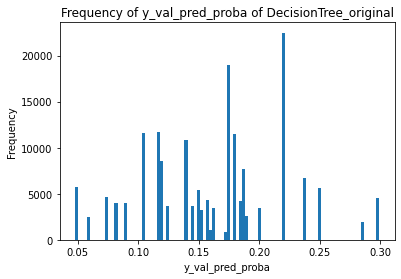

In [ ]:
# Predict probabilities for new data
y_val_pred_proba = best_estimator.predict_proba(X_val) # 확률로 추정된 X_val의 y_pred

plt.hist(y_val_pred_proba[:,1], bins=100)

plt.xlabel('y_val_pred_proba')
plt.ylabel('Frequency')
plt.title('Frequency of y_val_pred_proba of %s'%(model_name))

plt.savefig("%s_val_pre_proba_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

plt.show() # y_val_pred_proba의 분포 확인

In [ ]:
y_val_pred_proba

array([[0.74896124, 0.25103876],
       [0.91715432, 0.08284568],
       [0.81203708, 0.18796292],
       ...,
       [0.82484643, 0.17515357],
       [0.86106494, 0.13893506],
       [0.82484643, 0.17515357]])

### optimal threshold 선정 (threshold에 따른 목적함수 값 비교)

실제 positive = TP + FN

실제 Negative = TN + FP

정밀도: positive로 예측한 것 중에 진짜 positive인 것 -> 양성 예측도

재현율: 실제 positive 중에 맞춘 것 -> 민감도

In [ ]:
threshold_list = np.linspace(0.11,0.14,10) # 짝수개 값 (예시 10개)

Threshold에 따른 지표 비교

0, 1 count / confusion_matrix / accuracy, precision, recall, f1 score 

In [ ]:
def threshold_func(y_val, y_pred_proba, threshold_list):
    
    n = len(threshold_list)
    
    result_df = pd.DataFrame(index=['1_real','1_pred','0_real','0_pred','tn', 'fp', 'fn', 'tp', 'tn_%', 'fp_%', 'fn_%', 'tp_%', 'Accuracy', 'Precision', 'Recall', 'F1 score'])
    
    fig, axes = plt.subplots(nrows=int(n/2), ncols=2, figsize=(10, 10))
    
    for i in range(len(threshold_list)):
        
        threshold = threshold_list[i]
        
        # make Binarizer(y hat)
        binarizer = Binarizer(threshold = threshold).fit(y_pred_proba[:,1].reshape(-1,1))
        custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))
        
        # count 0, 1 in Binarizer(y hat)
        unique, counts = np.unique(custom_predict, return_counts=True)

        for val, count in zip(unique, counts):
            if len(unique) == 1:
                if val == 1.0:
                    num_0_pred = 0
                    num_1_pred = count
                elif val == 0.0:
                    num_1_pred = 0
                    num_0_pred = count
            if val == 1.0:
                num_1_pred = count
            elif val == 0.0:
                num_0_pred = count

        # count 0, 1 in y hat
        num_0_real = y_val.value_counts()[0]
        num_1_real = y_val.value_counts()[1]
        
        tn, fp, fn, tp = confusion_matrix(y_val, custom_predict).ravel()
        count = [tn, fp, fn, tp]
        tn_, fp_, fn_, tp_ = [round(x/sum(count)*100, 1) for x in count]
        
        accuracy = round((tp+tn)/(tp+tn+fp+fn),4)
        precision = round(tp/(tp+fp),4)
        recall = round(tp/(tp+fn),4)
        f1 = round(2*(precision*recall)/(precision+recall),4)
        
        threshold_tag = round(threshold_list[i], 4)
        
        result_df[threshold_tag] = [num_1_real, num_1_pred, num_0_real, num_0_pred, tn, fp, fn, tp, tn_, fp_, fn_, tp_, accuracy, precision, recall, f1]
        
        labels = ['TN','FP','FN','TP']
        
        # tn, fp, fn, tp 각각의 값을 counts 리스트에 저장
        counts = [tn, fp, fn, tp]

        # 해당하는 subplot에 그래프 그리기
        axes[i//2, i%2].bar(labels, counts)
        axes[i//2, i%2].set_title(threshold_tag)
        axes[i//2, i%2].set_ylabel('Count')

    # 그래프 간격 조절하기
    plt.tight_layout()
    
    plt.savefig("%s_threshold_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

    # 그래프 출력하기
    plt.show()
    
    result_df.to_csv('%s_threshold_%s.csv'%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), index=True)
    
    return result_df

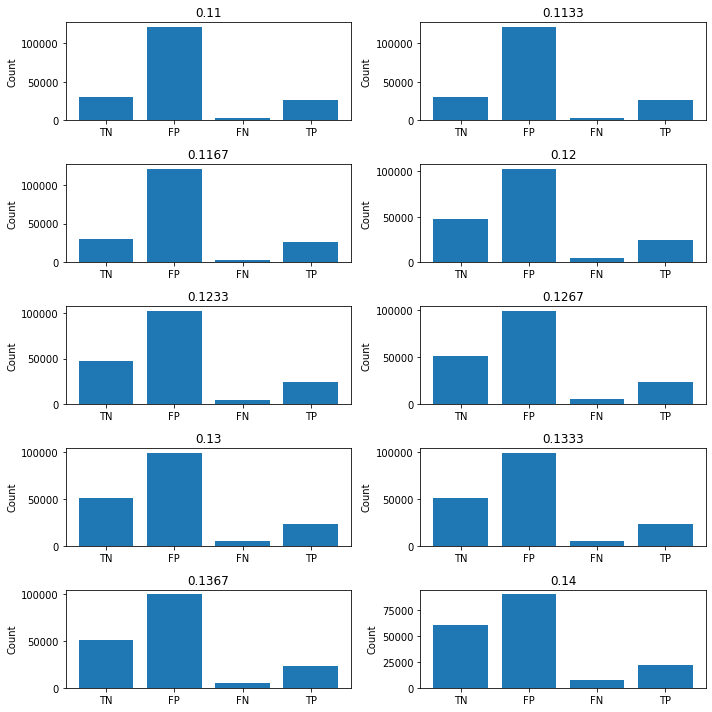

,0.1100,0.1133,0.1167,0.1200,0.1233,0.1267,0.1300,0.1333,0.1367,0.1400
1_real,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000
1_pred,146872.0000,146872.0000,146872.0000,126641.0000,126641.0000,122929.0000,122929.0000,122929.0000,122929.0000,112036.0000
0_real,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000
0_pred,32505.0000,32505.0000,32505.0000,52736.0000,52736.0000,56448.0000,56448.0000,56448.0000,56448.0000,67341.0000
tn,29781.0000,29781.0000,29781.0000,47716.0000,47716.0000,50941.0000,50941.0000,50941.0000,50941.0000,60290.0000
fp,120521.0000,120521.0000,120521.0000,102586.0000,102586.0000,99361.0000,99361.0000,99361.0000,99361.0000,90012.0000
fn,2724.0000,2724.0000,2724.0000,5020.0000,5020.0000,5507.0000,5507.0000,5507.0000,5507.0000,7051.0000
tp,26351.0000,26351.0000,26351.0000,24055.0000,24055.0000,23568.0000,23568.0000,23568.0000,23568.0000,22024.0000
tn_%,16.6000,16.6000,16.6000,26.6000,26.6000,28.4000,28.4000,28.4000,28.4000,33.6000
fp_%,67.2000,67.2000,67.2000,57.2000,57.2000,55.4000,55.4000,55.4000,55.4000,50.2000


In [ ]:
threshold_func(y_val, y_val_pred_proba, threshold_list)

Threshold에 따른 목적함수 값 비교

In [ ]:
OPT_threshold = None
OPT_expected_loss = None

def objective_func(y_pred_proba, threshold_list):
    
        result_df = pd.DataFrame(index=['1-TPR','FPR','w1_1-TPR','w2_FPR','Expected_loss'])
        
        expected_loss_list = []
        
        for i in range(len(threshold_list)):
            
            threshold = threshold_list[i]
            
            # make Binarizer(y hat)
            binarizer = Binarizer(threshold = threshold).fit(y_pred_proba[:,1].reshape(-1,1))
            custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))

            tn, fp, fn, tp = confusion_matrix(y_val, custom_predict).ravel()
            count = [tn, fp, fn, tp]
            
            tpr_1 = fn / (fn + tp)
            fpr = fp / (fp + tn)
            w1 = 0.55
            w2 = 0.45
            
            expected_loss = w1 * tpr_1 + w2 * fpr
            
            expected_loss_list.append(expected_loss)
            
            threshold_tag = round(threshold_list[i], 4)
        
            result_df[threshold_tag] = [tpr_1, fpr, w1*tpr_1, w2*fpr, expected_loss]
            
            if i == 0:
                opt_threshold = threshold
                opt_expected_loss = expected_loss
            else:
                if opt_expected_loss > expected_loss:
                    opt_threshold = threshold
                    opt_expected_loss = expected_loss
                    
#         expected_loss_list = [round(x, 1) for x in expected_loss_list]

        print(opt_threshold)
        print(opt_expected_loss)
        
        plt.plot(threshold_list, expected_loss_list)
        plt.scatter(threshold_list, expected_loss_list)
        
        plt.xlabel('Threshold')
        plt.ylabel('Expected_Loss')
        plt.title('Expected Loss of Thresholds of %s'%(model_name))

        plt.savefig("%s_expected_loss_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')
        
        plt.show()
        
        global OPT_threshold
        OPT_threshold = opt_threshold
        global OPT_expected_loss
        OPT_expected_loss = opt_expected_loss
        
        result_df.to_csv('%s_expected_loss_%s.csv'%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), float_format='%.3f', index=True)
        
        return result_df

0.12666666666666668
0.40165775415099203


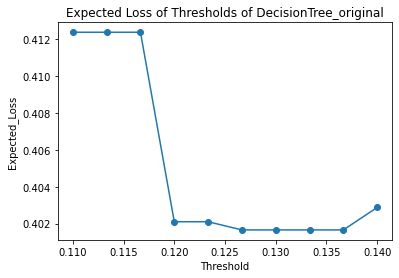

,0.1100,0.1133,0.1167,0.1200,0.1233,0.1267,0.1300,0.1333,0.1367,0.1400
1-TPR,0.093689,0.093689,0.093689,0.172657,0.172657,0.189407,0.189407,0.189407,0.189407,0.242511
FPR,0.801859,0.801859,0.801859,0.682533,0.682533,0.661076,0.661076,0.661076,0.661076,0.598874
w1_1-TPR,0.051529,0.051529,0.051529,0.094961,0.094961,0.104174,0.104174,0.104174,0.104174,0.133381
w2_FPR,0.360837,0.360837,0.360837,0.307140,0.307140,0.297484,0.297484,0.297484,0.297484,0.269493
Expected_loss,0.412365,0.412365,0.412365,0.402101,0.402101,0.401658,0.401658,0.401658,0.401658,0.402874


In [ ]:
objective_func(y_val_pred_proba, threshold_list)

# 더 세밀한 범위에서 optimal threshold를 잡고싶으면 한 번 더 다시 실행

In [ ]:
OPT_threshold

0.12666666666666668

histogram에 optimal threshold 표시

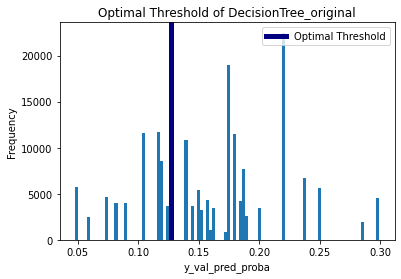

In [ ]:
plt.hist(y_val_pred_proba[:,1], bins=100)

plt.axvline(x=OPT_threshold, color='navy', linewidth=5, label='Optimal Threshold')

plt.xlabel('y_val_pred_proba')
plt.ylabel('Frequency')
plt.title('Optimal Threshold of %s'%(model_name))
plt.legend()

plt.savefig("%s_opt_threshold_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

plt.show() # y_val_pred_proba의 분포 확인

# Test 

### X_test fitting

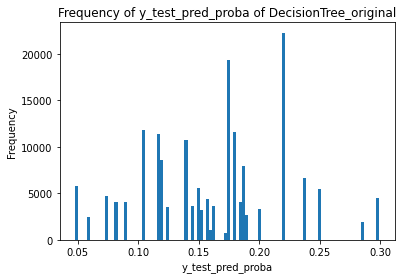

In [ ]:
# Predict probabilities for new data
y_test_pred_proba = best_estimator.predict_proba(X_test) # 확률로 추정된 X_test의 y_pred

plt.hist(y_test_pred_proba[:,1], bins=100)

plt.xlabel('y_test_pred_proba')
plt.ylabel('Frequency')
plt.title('Frequency of y_test_pred_proba of %s'%(model_name))

plt.savefig("%s_test_pre_proba_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

plt.show() # y_test_pred_proba의 분포 확인

### 0, 1 count / confusion_matrix / accuracy, precision, recall, f1 score 

In [ ]:
def test_func(y_test, y_pred_proba, opt_threshold):
        
    # make Binarizer(y hat)
    binarizer = Binarizer(threshold = opt_threshold).fit(y_pred_proba[:,1].reshape(-1,1))
    custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))

    # count 0, 1 in Binarizer(y hat)
    unique, counts = np.unique(custom_predict, return_counts=True)

    for val, count in zip(unique, counts):
        if len(unique) == 1:
            if val == 1.0:
                num_0_pred = count
                num_1_pred = 0
            elif val == 0.0:
                num_1_pred = count
                num_0_pred = 0
        if val == 1.0:
            num_0_pred = count
        elif val == 0.0:
            num_1_pred = count

    # count 0, 1 in y hat
    num_1_real = y_test.value_counts()[0]
    num_0_real = y_test.value_counts()[1]

    tn, fp, fn, tp = confusion_matrix(y_test, custom_predict).ravel()
    count = [tn, fp, fn, tp]
    tn_, fp_, fn_, tp_ = [round(x/sum(count)*100, 1) for x in count]

    accuracy = round((tp+tn)/(tp+tn+fp+fn),4)
    precision = round(tp/(tp+fp),4)
    recall = round(tp/(tp+fn),4)
    f1 = round(2*(precision*recall)/(precision+recall),4)
    
    result_df = pd.DataFrame(index=['1_real','1_pred','0_real','0_pred','tn', 'fp', 'fn', 'tp', 'tn_%', 'fp_%', 'fn_%', 'tp_%', 'Accuracy', 'Precision', 'Recall', 'F1 score'])

    result_df['result'] = [num_1_real, num_1_pred, num_0_real, num_0_pred, tn, fp, fn, tp, tn_, fp_, fn_, tp_, accuracy, precision, recall, f1]

    labels = ['TN','FP','FN','TP']


    # 혼동 행렬 시각화
    labels = ['Positive', 'Negative']
    cm = [[tp, fn], [fp, tn]]

    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('Acutual Class')
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_title('%s Confusion Matrix'%(model_name))
    
    ax.text(0.45, 1.40, 'FP', fontsize=12, color='red')
    ax.text(1.45, 1.40, 'TN', fontsize=12, color='red')
    ax.text(0.45, 0.40, 'TP', fontsize=12, color='red')
    ax.text(1.45, 0.40, 'FN', fontsize=12, color='red')
    
    plt.savefig("%s_Confusion_Matrix_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')
    plt.show()
    
    result_df.T.to_csv('%s_test.csv'%(model_name), index=True)

    return result_df.T

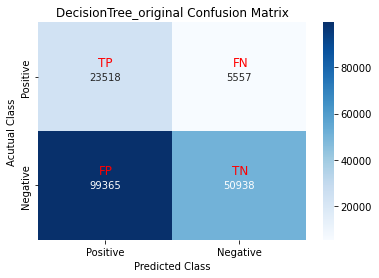

,1_real,1_pred,0_real,0_pred,tn,fp,fn,tp,tn_%,fp_%,fn_%,tp_%,Accuracy,Precision,Recall,F1 score
result,150303.0,56495.0,29075.0,122883.0,50938.0,99365.0,5557.0,23518.0,28.4,55.4,3.1,13.1,0.4151,0.1914,0.8089,0.3096


In [ ]:
test_func(y_test, y_test_pred_proba, OPT_threshold)

### Objective Function

In [ ]:
def test_objective_func(y_test, y_pred_proba, threshold):
    
        result_df = pd.DataFrame(index=['1-TPR','FPR','w1_1-TPR','w2_FPR','Expected_loss'])
            
        # make Binarizer(y hat)
        binarizer = Binarizer(threshold = threshold).fit(y_pred_proba[:,1].reshape(-1,1))
        custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))

        tn, fp, fn, tp = confusion_matrix(y_test, custom_predict).ravel()
        count = [tn, fp, fn, tp]

        tpr_1 = fn / (fn + tp)
        fpr = fp / (fp + tn)
        w1 = 0.55
        w2 = 0.45

        expected_loss = w1 * tpr_1 + w2 * fpr

        result_df[threshold] = [tpr_1, fpr, w1*tpr_1, w2*fpr, expected_loss]

        print(expected_loss)
        
        result_df.T.to_csv('%s_test_expected_loss_%s.csv'%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), float_format='%.6f', index=True)
        
        return result_df

In [ ]:
test_objective_func(y_test, y_test_pred_proba, OPT_threshold)

0.402613580481443


,0.126667
1-TPR,0.191126
FPR,0.661098
w1_1-TPR,0.105120
w2_FPR,0.297494
Expected_loss,0.402614


### ROC curve

거짓 양성 비율(FPR, 1-TNR:1-특이도)에 대한 진짜 양성 비율(TPR, 재현율)의 곡선

정밀도: positive로 예측한 것 중에 진짜 positive인 것 -> 양성 예측도

재현율: 실제 positive 중에 맞춘 것 -> 민감도

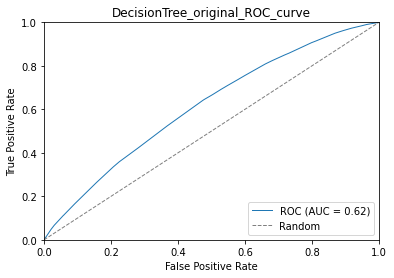

In [ ]:
# Generate ROC curve and AUC score for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1, label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s_ROC_curve'%(model_name))
plt.legend(loc='lower right')

plt.savefig("%s_ROC_curve_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')
plt.show()

# Test 

### X_test fitting

In [1]:
# Predict probabilities for new data
y_test_pred_proba = best_estimator.predict_proba(X_test) # 확률로 추정된 X_test의 y_pred

plt.hist(y_test_pred_proba[:,1], bins=100)
plt.show() # y_test_pred_proba의 분포 확인

NameError: ignored

### 0, 1 count / confusion_matrix / accuracy, precision, recall, f1 score 

In [ ]:
def test_func(y_test, y_pred_proba, opt_threshold):
        
    # make Binarizer(y hat)
    binarizer = Binarizer(threshold = opt_threshold).fit(y_pred_proba[:,1].reshape(-1,1))
    custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))

    # count 0, 1 in Binarizer(y hat)
    unique, counts = np.unique(custom_predict, return_counts=True)

    for val, count in zip(unique, counts):
        if len(unique) == 1:
            if val == 1.0:
                num_0_pred = count
                num_1_pred = 0
            elif val == 0.0:
                num_1_pred = count
                num_0_pred = 0
        if val == 1.0:
            num_0_pred = count
        elif val == 0.0:
            num_1_pred = count

    # count 0, 1 in y hat
    num_1_real = y_test.value_counts()[0]
    num_0_real = y_test.value_counts()[1]

    tn, fp, fn, tp = confusion_matrix(y_test, custom_predict).ravel()
    count = [tn, fp, fn, tp]
    tn_, fp_, fn_, tp_ = [round(x/sum(count)*100, 1) for x in count]

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    result_df = pd.DataFrame(index=['1_real','1_pred','0_real','0_pred','tn', 'fp', 'fn', 'tp', 'tn_%', 'fp_%', 'fn_%', 'tp_%', 'Accuracy', 'Precision', 'Recall', 'F1 score'])

    result_df['result'] = [num_1_real, num_1_pred, num_0_real, num_0_pred, tn, fp, fn, tp, tn_, fp_, fn_, tp_, accuracy, precision, recall, f1]

#         labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    labels = ['TN','FP','FN','TP']

    # tn, fp, fn, tp 각각의 값을 counts 리스트에 저장
    counts = [tn, fp, fn, tp]

    # 그래프 그리기
    axes.bar(labels, counts)
    axes.set_title(threshold)
    axes.set_ylabel('Count')

    # 그래프 출력하기
    plt.show()
    
    cm = confusion_matrix(y_test, custom_predict)
    print('Confusion matrix:')
    print(cm)
    
    print(result_df)

In [ ]:
test_func(y_test, y_test_pred_proba, opt_threshold)

### ROC curve

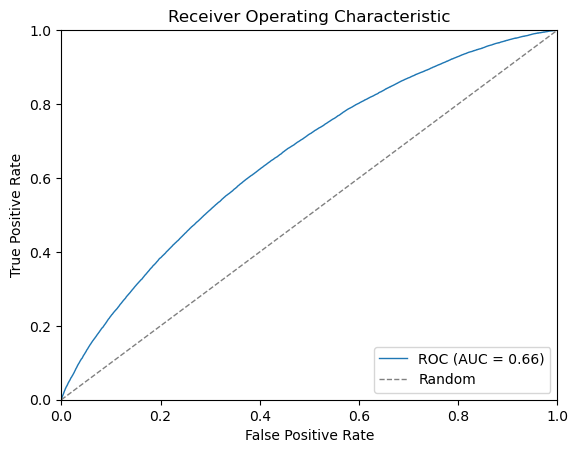

In [ ]:
# Generate ROC curve and AUC score for the validation set
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1, label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()